<a href="https://colab.research.google.com/github/ranjith28100/Hard-Coding-ML-Algorithms/blob/main/simple_linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Libraries and  Loading the dataset

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import math
import random
import tqdm
from google.colab import files
import io

In [3]:
my_file = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


In [6]:
data = pd.read_csv(io.BytesIO(my_file['Admission_Predict_Ver1.1.csv'])) 

In [7]:
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
data = data[['CGPA','Chance of Admit ']]

In [10]:
data = data.dropna()

In [11]:
X = data['CGPA']

In [12]:
y = data['Chance of Admit ']

# Looking at the distribution of Independent data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


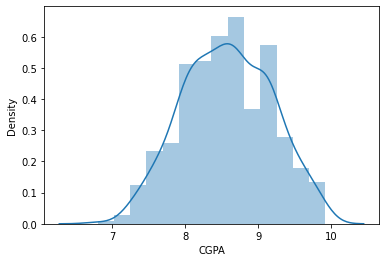

In [13]:
sns.distplot(X)

# Helper Functions

In [17]:
def mean(xs)->float:
    return sum(xs)/len(xs)

In [18]:
def de_mean(xs):
    x_bar = mean(xs)
    return [x_i-x_bar for x_i in xs]

In [19]:
def variance(xs)->float:
    assert len(xs)>2,"Variance requires atleast two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum(x**2 for x in deviations)/(n-1)

In [20]:
def standard_deviation(xs)->float:
    return math.sqrt(variance(xs))

In [21]:
def covariance(xs,ys):
    assert len(xs) == len(ys), "xs and ys should be of same size"
    return np.dot(np.array(de_mean(xs)),np.array(de_mean(ys)))/(len(xs)-1)

In [22]:
def correlation(xs,ys)->float:
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x>0 and stdev_y>0:
        return covariance(xs,ys)/(stdev_x*stdev_y)

#Loading the functions required for performing Linear Regression

In [23]:
from typing import Tuple

In [14]:
def predict(alpha:float,beta:float,x_i:float)->float:
    return beta*x_i+alpha

In [109]:
def error(alpha:float,beta:float,x_i:float,y_i:float)->float:
    return (predict(alpha,beta,x_i)-y_i)

In [16]:
def sum_of_sqerrors(alpha,beta,x,y)->float:
    return sum(error(alpha,beta,x_i,y_i)**2 for x_i,y_i in zip(x,y))

In [24]:
def least_squares_fit(x,y)->Tuple[float,float]:
    beta = correlation(x,y)*standard_deviation(y)/standard_deviation(x)
    alpha = mean(y)-beta*mean(x)
    return alpha,beta
    

In [25]:
alpha, beta = least_squares_fit(X,y)

In [26]:
alpha,beta

(-1.0443349238990416, 0.20592167891328342)

In [29]:
predict(alpha,beta,7.45)

0.48978158400492

In [31]:
mean(data[data['CGPA']==7.45]['Chance of Admit '])

0.52

In [32]:
y_pred = [predict(alpha,beta,i) for i in X]

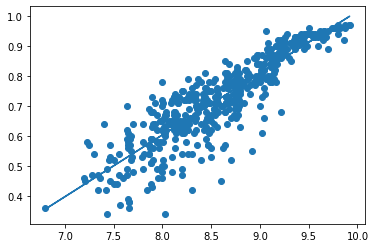

In [38]:
plt.scatter(X,y)
plt.plot(X,y_pred)

# R-Squared Error

In [34]:
def total_sum_of_squares(y)->float:
    return sum(v**2 for v in de_mean(y))

In [35]:
def r_squared(alpha,beta,x,y)->float:
    return 1.0-(sum_of_sqerrors(alpha,beta,x,y)/total_sum_of_squares(y))

In [36]:
rsq = r_squared(alpha,beta,X,y)

In [37]:
print(rsq)

0.778651952349721


# Using Gradient Descent Method

In [67]:
def add(v,w):
  assert len(v)==len(w), "vectors must be same length"
  return[v_i+w_i for v_i,w_i in zip(v,w)]

In [69]:
def scalar_multiply(c,v):
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

In [70]:
def gradient_step(v,gradient,step_size):
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size,gradient)
    return add(v,step)

In [121]:
num_epochs = 10000
random.seed(0)

In [122]:
guess = [random.random(),random.random()]

In [123]:
guess

[0.8444218515250481, 0.7579544029403025]

In [124]:
learning_rate = 0.000001

In [125]:
with tqdm.trange(num_epochs) as t:
        for _ in t:
            alpha, beta = guess
    
            # Partial derivative of loss with respect to alpha
            grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                         for x_i, y_i in zip(X,y))
    
    
            # Partial derivative of loss with respect to beta
            grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                         for x_i, y_i in zip(X,y))
    
            # Compute loss to stick in the tqdm description
            loss = sum_of_sqerrors(alpha, beta,X,y)
            t.set_description(f"loss: {loss:.3f}")
    
            # Finally, update the guess
            guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)

loss: 9.462: 100%|██████████| 10000/10000 [00:34<00:00, 286.70it/s]


In [126]:
alpha,beta = guess

In [127]:
guess

[0.6704953459796078, 0.006949399122666156]

#R-Squared Error

In [128]:
rsq = r_squared(alpha,beta,X,y)

In [129]:
print(rsq)

0.04815627773606235


In [130]:
y_pred = [predict(alpha,beta,i) for i in X]

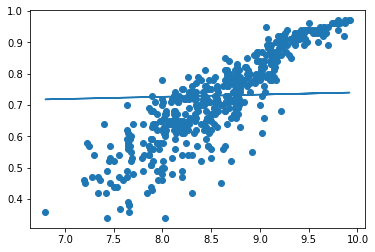

In [131]:
plt.scatter(X,y)
plt.plot(X,y_pred)

# Predicting new value

In [132]:
predict(alpha,beta,8.2)

0.7274804187854703